# Parte 2 Trabajo, CNN con CIFAR-10

Importacion de los paquetes necesarios:

In [1]:
import matplotlib.pyplot as plt

from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers.convolutional import Conv2D
from keras.utils import np_utils

Using TensorFlow backend.


Cargar el conjunto de datos CIFAR-10 con la función de ayuda de Keras:

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Normalizacion: Píxeles en rango 0-255 para canales rojo, verde y azul. Como los valores de entrada son conocidos podemos normalizar a rango 0-1 dividiendo cada valor por observación máxima (255). Para dividir cambiamos datos enteros a flotantes.

In [3]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255.0
x_test = x_test / 255.0

Codificacion de la salida: Variables de salida se denotan como vector de números enteros 0-1. Transformamos en matriz binaria para modelar mejor el problema de la clasificación.

In [4]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

Creacion y compilacion del modelo CNN:

In [5]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape = (32, 32, 3), activation = 'relu'))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(Conv2D(128, (3, 3), activation = 'relu'))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation ='relu'))
model.add(Dense(32, activation = "relu")) 
model.add(Dense(num_classes, activation = 'sigmoid'))

model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Entrenar modelo: 10 epocas y tamaño de lote 64:

In [6]:
model.fit(x_train, y_train, batch_size = 64, epochs = 10, validation_data = (x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 263s 5ms/step - loss: 0.2406 - accuracy: 0.9097 - val_loss: 0.1919 - val_accuracy: 0.9247
Epoch 2/10
50000/50000 [==============================] - 255s 5ms/step - loss: 0.1693 - accuracy: 0.9344 - val_loss: 0.1745 - val_accuracy: 0.9329
Epoch 3/10
50000/50000 [==============================] - 254s 5ms/step - loss: 0.1370 - accuracy: 0.9471 - val_loss: 0.1441 - val_accuracy: 0.9439
Epoch 4/10
50000/50000 [==============================] - 255s 5ms/step - loss: 0.1115 - accuracy: 0.9572 - val_loss: 0.1387 - val_accuracy: 0.9471
Epoch 5/10
50000/50000 [==============================] - 254s 5ms/step - loss: 0.0833 - accuracy: 0.9683 - val_loss: 0.1498 - val_accuracy: 0.9461
Epoch 6/10
50000/50000 [==============================] - 255s 5ms/step - loss: 0.0570 - accuracy: 0.9790 - val_loss: 0.1736 - val_accuracy: 0.9434
Epoch 7/10
50000/50000 [==============================] - 255s

Hacemos predicciones:

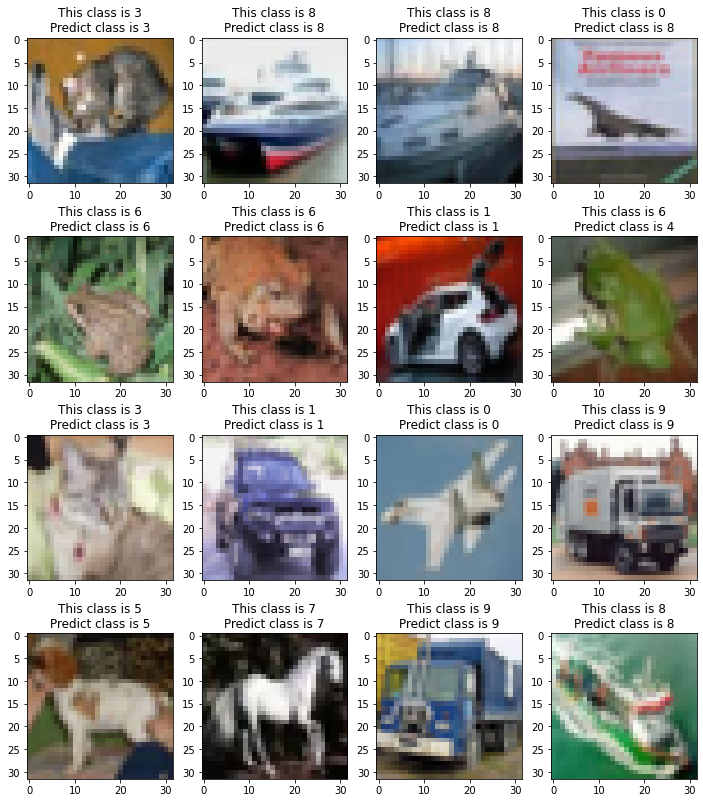

In [8]:
prediccion = model.predict(x_test)
fig, axis = plt.subplots(4, 4, figsize = (12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(x_test[i], cmap = 'binary')
    ax.set(title = f"This class is {y_test[i].argmax()}\nPredict class is {prediccion[i].argmax()}");  

Classes: 
- 0: airplane 
- 1: automobile 
- 2: bird  
- 3: cat 
- 4: deer 
- 5: dog 
- 6: frog   
- 7: horse 
- 8: ship  
- 9: truck

In [9]:
scores = model.evaluate(x_test, y_test, verbose = 0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 93.94%
